,ray1,ray2,ray3,ray4,ray5,kartx,karty,kartz,time,action
87,17.908130,5.011419,4.280182,-1.000000,-1.000000,-12.175000,0.279163,57.44358,8.802609,LEFT_ACCELERATE
88,18.690660,4.610378,3.760737,-1.000000,-1.000000,-13.659610,0.279164,57.65280,8.903328,LEFT_ACCELERATE
89,17.474800,4.513628,3.668613,-1.000000,-1.000000,-15.092470,0.279161,57.83345,9.000292,ACCELERATE
90,16.079550,4.460663,3.618864,-1.000000,-1.000000,-16.593550,0.279161,58.03268,9.101952,LEFT_ACCELERATE
91,16.126660,3.206959,2.499199,-1.000000,-1.000000,-18.058820,0.279163,58.18198,9.200894,LEFT_ACCELERATE
...,...,...,...,...,...,...,...,...,...,...
10124,11.836230,-1.000000,-1.000000,2.450530,1.934736,-10.084570,0.279162,-45.71747,19.001990,ACCELERATE
10125,10.376820,-1.000000,-1.000000,2.249434,1.776213,-8.587298,0.279161,-45.87234,19.103050,ACCELERATE
10126,8.979159,-1.000000,-1.000000,2.049980,1.616839,-7.127993,0.279160,-46.02808,19.201580,LEFT_ACCELERATE
10127,8.702519,-1.000000,-1.000000,2.017563,1.531392,-5.636408,0.279163,-46.14282,19.302070,LEFT_ACCELERATE


Index(['ACCELERATE', 'LEFT_ACCELERATE', 'RIGHT_ACCELERATE'], dtype='object')


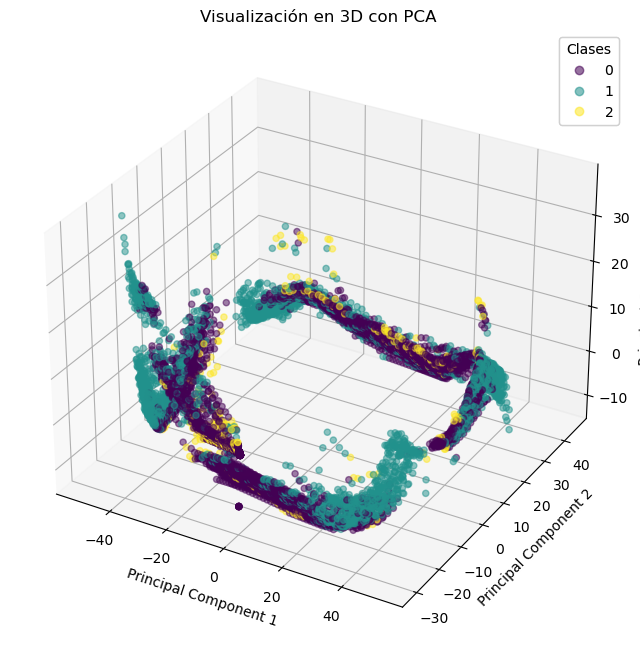

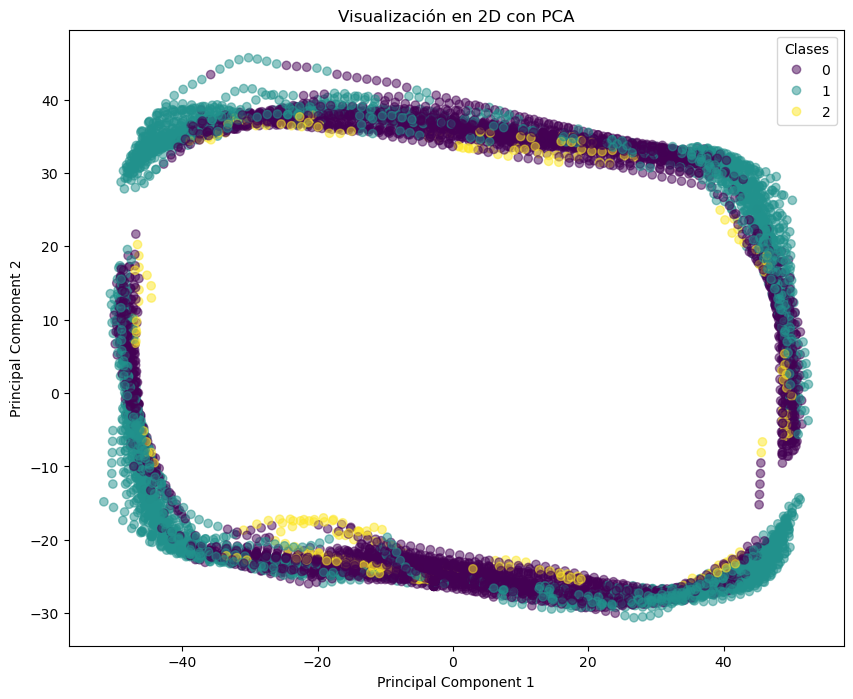

           ray1      ray2      ray3      ray4      ray5     kartx     karty  \
0      49.03510  6.521043  4.611090  6.489725  4.588912  15.98893  0.275615   
1      26.52792  6.520910  4.611073  6.489857  4.588929  15.98893  0.275707   
2      26.49496  6.520908  4.611071  6.489859  4.588931  15.98893  0.275722   
3      26.48998  6.520906  4.611070  6.489861  4.588932  15.98893  0.275725   
4      26.48590  6.520902  4.611067  6.489864  4.588934  15.98893  0.275744   
...         ...       ...       ...       ...       ...       ...       ...   
10170  24.57170  5.960901  4.295493  7.073489  4.906185  16.30633  0.279159   
10171  24.57090  5.922115  4.267509  7.113773  4.934168  16.33436  0.279160   
10172  24.57171  5.883925  4.239944  7.153432  4.961732  16.36193  0.279160   
10173  24.57126  5.845483  4.212191  7.193349  4.989481  16.38992  0.279160   
10174  24.57105  5.805372  4.183229  7.234997  5.018442  16.41868  0.279160   

           kartz       time      action  
0       3

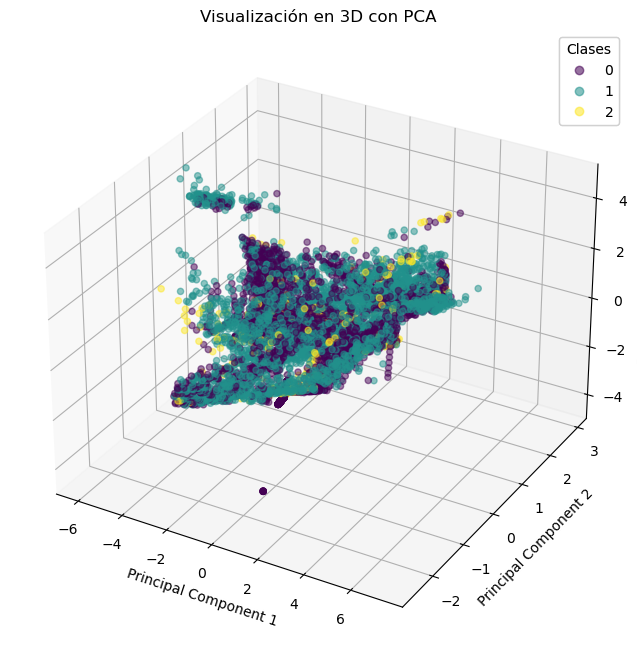

In [1]:
import pandas as pd
import glob
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

path = "dataset/raw/"

all_files = glob.glob(os.path.join(path , "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

#Excluir acciones en las que no se hace nada
df = df[df['action'] != 'NONE']

#buscamos los valores -1 para quitarlos
mask = df.applymap(lambda x:  x == -1)
display(df[mask.any(axis=1)])
df = df.drop(df[mask.any(axis=1)].index)

#quitarlos en vez de hacer esto da mejores resultados al entrenar los modelos
#df["ray1"] = df["ray1"].replace(-1, 1000)
#df["ray2"] = df["ray2"].replace(-1, 1000)
#df["ray3"] = df["ray3"].replace(-1, 1000)
#df["ray4"] = df["ray4"].replace(-1, 1000)
#df["ray5"] = df["ray5"].replace(-1, 1000)

# Seleccionar todas las columnas como características
X = df.drop('action', axis=1)  # Excluir la columna 'action' si es la etiqueta/clase

# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Asignar colores numéricos a cada clase
class_colors, class_labels = pd.factorize(df['action'])

print(class_labels)

# Crear un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=class_colors, cmap='viridis', alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Visualización en 3D con PCA')

# Leyenda
legend = ax.legend(*scatter.legend_elements(), title='Clases')
ax.add_artist(legend)

plt.show()

# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un gráfico bidimensional
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=class_colors, cmap='viridis', alpha=0.5)

# Etiquetas de los ejes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualización en 2D con PCA')

# Leyenda
plt.legend(*scatter.legend_elements(), title='Clases')

plt.show()

print(df)

print("---------------------------------------------------------------------------")

#quitamos la y porque no aporta nada
X = X.drop("karty", axis=1)

# Normalizar
scaling = StandardScaler()
scaling.fit(X)
X = scaling.transform(X)

print(scaling.mean_)
print()
print(scaling.scale_)
print()

# Exportar, de nuevo con acciones
actions = df["action"].reset_index()
out = pd.DataFrame(X)
actions.reset_index()
out.reset_index()
out = pd.concat([out, actions], axis=1)
out = out.drop('index', axis=1)

print(out)
out.to_csv('dataset/normalized/kart.csv', index=False, header=["ray1", "ray2", "ray3", "ray4", "ray5", "kartx", "kartz", "time", "action"])

pca = PCA(n_components=3)
X_pca = pca.fit_transform(out.drop('action', axis=1))

# Crear un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=class_colors, cmap='viridis', alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Visualización en 3D con PCA')

# Leyenda
legend = ax.legend(*scatter.legend_elements(), title='Clases')
ax.add_artist(legend)

plt.show()